<b> DATA COLLECTION <b>

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, roc_auc_score, classification_report
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Loading the CSV files into the dataframes
redWine = pd.read_csv('/Users/srijaanasuri/Downloads/wine+quality (1)/winequality-red.csv', sep = ";")
whiteWine = pd.read_csv('/Users/srijaanasuri/Downloads/wine+quality (1)/winequality-white.csv', sep = ";")
print("Dataset size of red wine - ", len(redWine))
print("Dataset size of white wine - ", len(whiteWine))

# Creating a new column 'WineType' and setting values accordingly
redWine['WineType'] = 'red'
whiteWine['WineType'] = 'white'

# Merging both DataFrames into a single dataframe.
Wine = pd.concat([redWine, whiteWine], ignore_index = True)

# Displaying the first few rows of the combined DataFrame to verify the changes
print("Displaying the combined dataframe - \n", Wine.head())

# Checking the information about different variables from the dataset
Wine.info()

Dataset size of red wine -  1599
Dataset size of white wine -  4898
Displaying the combined dataframe - 
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  

In [3]:
# Shape of the Wine dataset
Wine.shape

(6497, 13)

In [4]:
# Features of the Wine dataset
Wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'WineType'],
      dtype='object')

In [5]:
# Summary of the Wine dataset
Wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<b> DATA CLEANING & TRANSFORMATION </b>

<b> 1. Checking missing values. </b>

In [6]:
Wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


<Axes: >

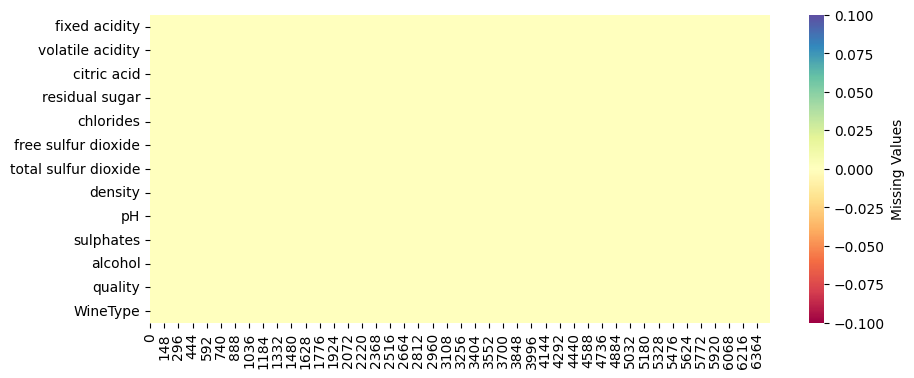

In [7]:
plt.figure(figsize=(10,4))
sns.heatmap(Wine.isna().transpose(),
            cmap="Spectral",
            cbar_kws={'label': 'Missing Values'})

The dataset contains no missing values across all features, as confirmed by the null value count for each column being zero. This ensures data consistency and eliminates the need for imputation or further preprocessing related to missing data, allowing for a straightforward analysis and model development.

<b> 2. Checking for duplicate values. </b>

In [8]:
duplicate_Rows = Wine[Wine.duplicated(keep=False)]
#print("Duplicate Rows - \n", duplicate_Rows)
print("Duplicate Rows Count - ", Wine.duplicated().sum())
New_Wine = Wine.drop_duplicates(keep = "first")
print("Checking if duplicate rows are removed from the dataset - ", New_Wine.duplicated().sum())

Duplicate Rows Count -  1177
Checking if duplicate rows are removed from the dataset -  0


Duplicate rows are identified and removed, retaining only the first occurrence of each entry. A final check confirmed the dataset is now free of duplicates.

<b>3. Converting a categorical feature(WineType) to a numerical feature using encoding technique. And Checking unique values of the target feature 'quality'. </b>

In [9]:
# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Applying the label encoding to the WineType column
New_Wine.loc[:, 'WineType'] = label_encoder.fit_transform(New_Wine['WineType'])

# Displaying the updated DataFrame
print(New_Wine.head())

# Getting the unique values of the target variable
print(New_Wine['quality'].value_counts())
print(New_Wine['quality'].unique())

# Filtering out classes with very smaller counts
New_Wine = New_Wine[~New_Wine['quality'].isin([3, 9])]

# Checking the updated class distribution
print(New_Wine['quality'].value_counts())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality WineType  
0      9.4        5        0  
1      9.8        5     

Classes with very small counts, specifically quality ratings 3 and 9, were removed to ensure a more balanced class distribution and avoid potential biases during model training. The updated dataset reflects this refined class distribution.

<b>4. Checking for outliers in the dataset. </b>

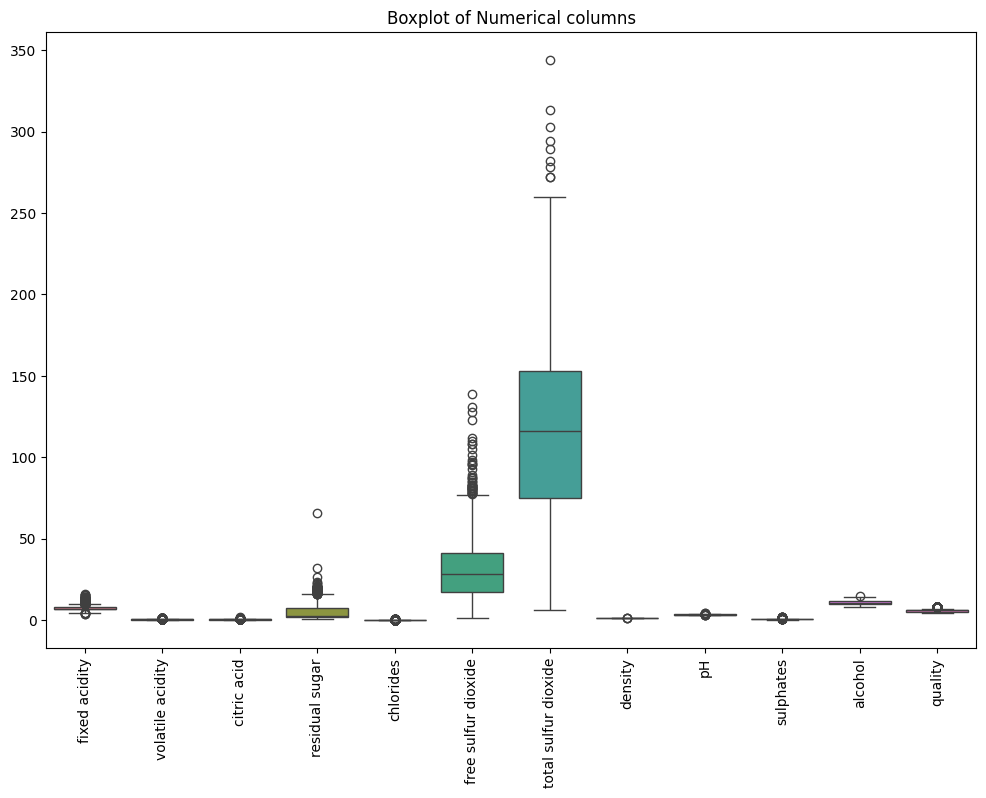

In [10]:
numerical_features = New_Wine.select_dtypes(include = ['float64', 'int64']).columns

# Plotting boxplots for numerical columns to detect outliers
plt.figure(figsize = (12, 8))
sns.boxplot(data = New_Wine[numerical_features])
plt.xticks(rotation = 90)
plt.title('Boxplot of Numerical columns')
plt.show()

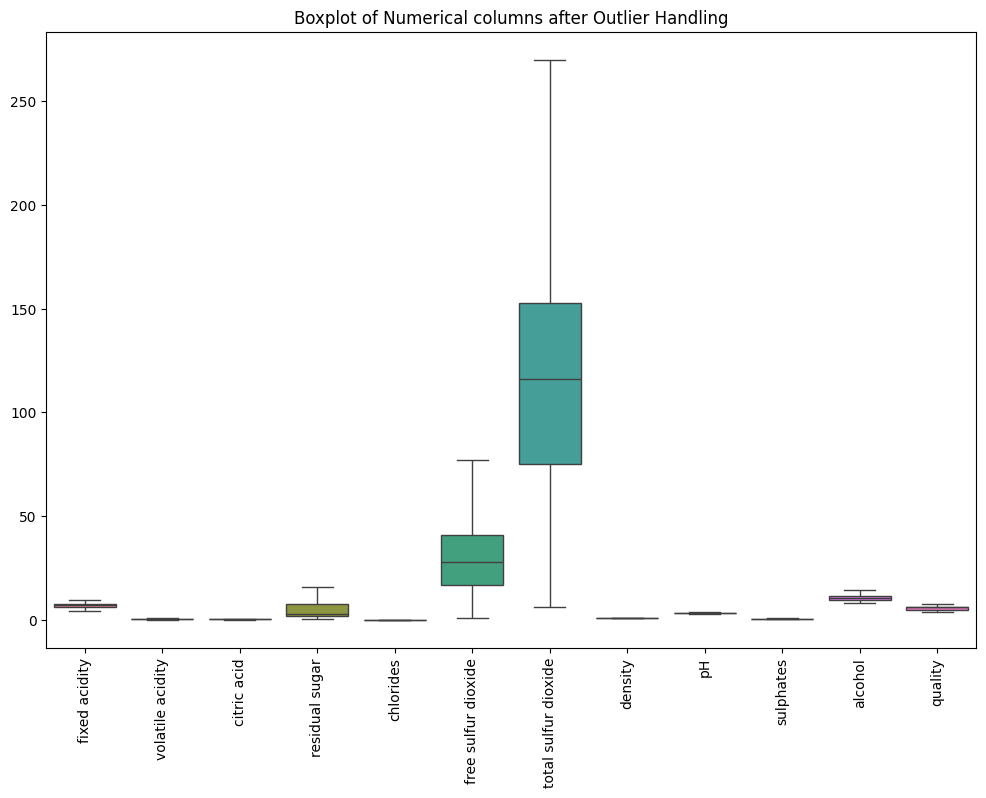

In [11]:
# Handling outliers in the dataset by using Capping technique
# Imputing the outliers to the IQR range
Wine_impute = New_Wine.copy()

for col in numerical_features:
    Q1 = Wine_impute[col].quantile(0.25)
    Q3 = Wine_impute[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Applying imputation
    Wine_impute[col] = Wine_impute[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

New_Wine = Wine_impute.copy()

# Plotting boxplots again to verify
plt.figure(figsize = (12, 8))
sns.boxplot(data = New_Wine[numerical_features])
plt.xticks(rotation = 90)
plt.title('Boxplot of Numerical columns after Outlier Handling')
plt.show()

Outliers in the dataset are addressed using the Interquartile Range (IQR) technique. For each numerical column, the lower and upper bounds were calculated respectively. Values falling outside this range were capped at the calculated bounds, ensuring they remain within a reasonable range while preserving the overall distribution of the data. This step helps improve model performance by reducing the impact of extreme values.

<b>EXPLORATORY DATA ANALYSIS</b>

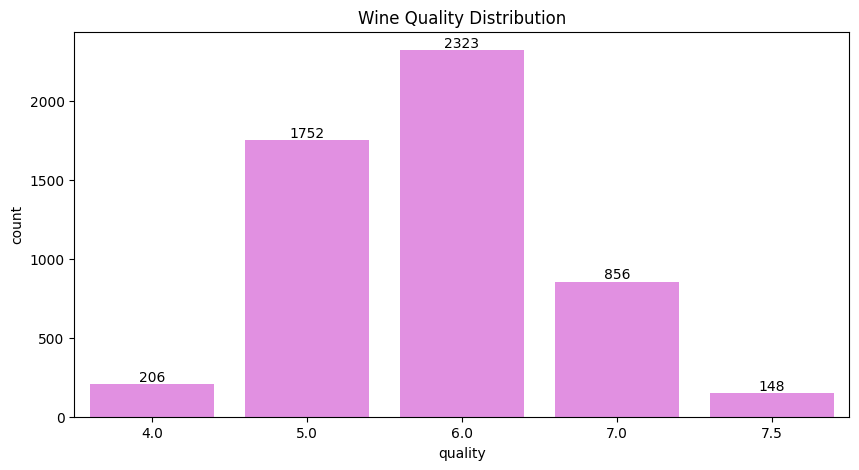

In [12]:
# Wine Quality Distribution
plt.figure(figsize = (10,5))
ax = sns.countplot(x = "quality", data = New_Wine, color = 'violet')
plt.title("Wine Quality Distribution")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

Based on the wine quality distribution data, it is evident that the majority of the wine samples are rated as 6 in terms of quality, while there are notably fewer samples with a quality rating of 4 and 7.5.

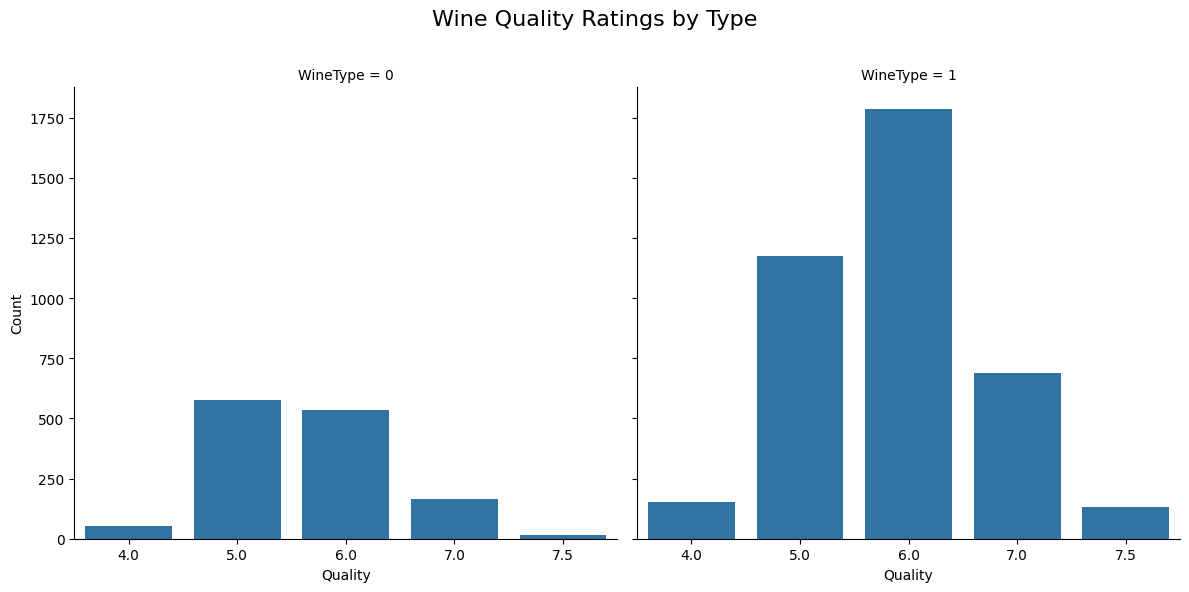

In [13]:
# Wine Quality Ratings by Type
g = sns.FacetGrid(New_Wine, col = "WineType", height = 6, aspect = 1)
g.map(sns.countplot, "quality", order = sorted(New_Wine['quality'].unique()))
g.set_axis_labels("Quality", "Count")
g.fig.suptitle("Wine Quality Ratings by Type", fontsize = 16)
g.fig.subplots_adjust(top=0.85)
plt.show()

Red wines (0) typically achieve a rating of 5 and 6. The majority of white wines (1) tend to receive a quality rating of 5, 6 and 7.

<ipython-input-14-6e558f5386d0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'quality', y = 'alcohol', data = New_Wine, palette = 'Reds', ci = None)
<ipython-input-14-6e558f5386d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'quality', y = 'alcohol', data = New_Wine, palette = 'Reds', ci = None)


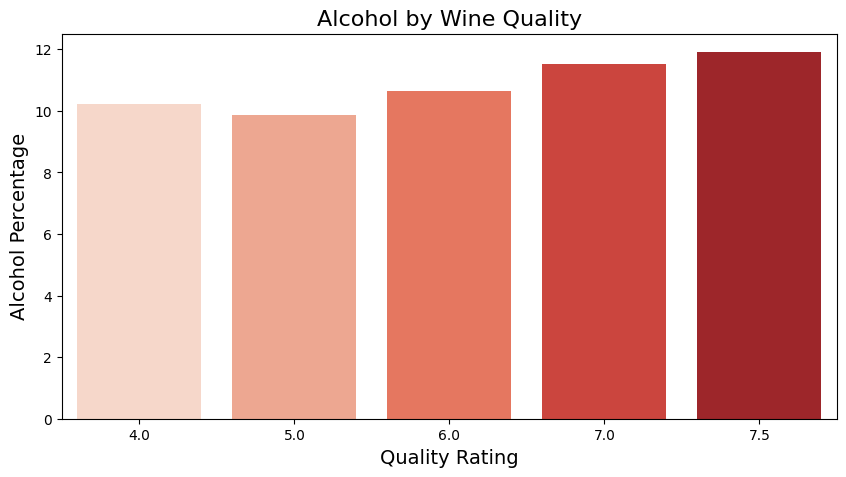

In [14]:
# Visual of how important alcohol content is
fig = plt.figure(figsize = (10,5))
sns.barplot(x = 'quality', y = 'alcohol', data = New_Wine, palette = 'Reds', ci = None)
plt.xlabel("Quality Rating", fontsize = 14)
plt.ylabel("Alcohol Percentage", fontsize = 14)
plt.title("Alcohol by Wine Quality", fontsize = 16)
plt.show()

Visual of how important alcohol content is, from the graph it is evident that more the alcohol percentage the better rating the wine got.

<ipython-input-15-04a7e7c1d986>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "quality", y = "residual sugar", data = New_Wine,


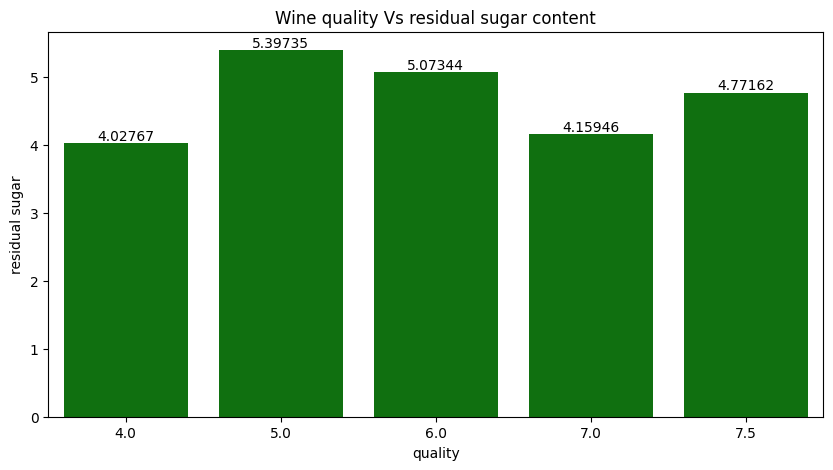

In [15]:
# Wine quality Vs residual sugar content
figure = plt.figure(figsize = (10,5))
ax = sns.barplot(x = "quality", y = "residual sugar", data = New_Wine,
                 color = 'green', ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("Wine quality Vs residual sugar content")
plt.show()

Wines with quality 5 have the highest residual sugar, while quality 4 wines have the lowest. Residual sugar slightly decreases in premium wines (quality 7+), reflecting balanced sweetness. Moderate sugar levels seem key to mid-quality wines.

<b>RESEARCH QUESTION 1 - </b> <br>
What are the correlations between physicochemical properties such as fixed acidity, volatile acidity, pH, and alcohol content of wine towards its quality?
- Exploring how these physicochemical features influence wine quality and identify significant correlations.

In [16]:
corr_matrix = New_Wine.corr()

# Sorting the correlations with respect to the 'quality' column in descending order
corr_quality = corr_matrix['quality'].sort_values(ascending = False)
print(corr_quality)

quality                 1.000000
alcohol                 0.478052
WineType                0.113073
citric acid             0.106081
free sulfur dioxide     0.070752
sulphates               0.059916
pH                      0.044203
total sulfur dioxide   -0.051300
residual sugar         -0.058827
fixed acidity          -0.094370
chlorides              -0.260154
volatile acidity       -0.261492
density                -0.335902
Name: quality, dtype: float64


<Axes: >

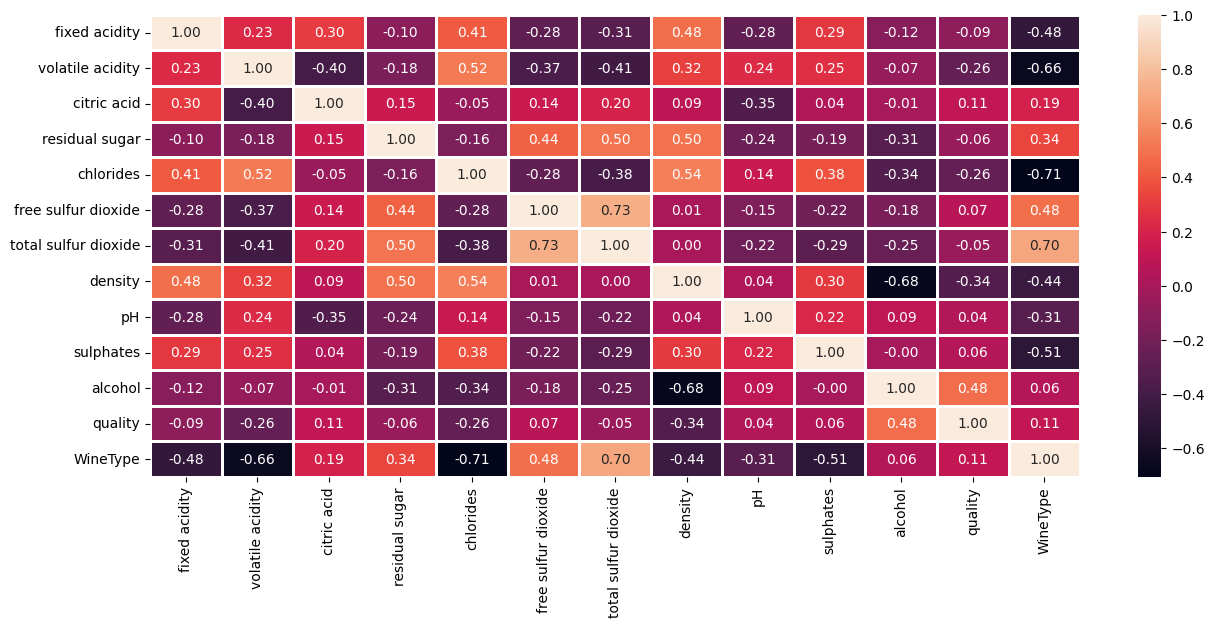

In [17]:
plt.figure(figsize=(15,6))
sns.heatmap(New_Wine.corr(), annot=True, fmt='.2f', linewidths=2)

<b> RESEARCH QUESTION 2 - </b><br>
How effective are various classification models in predicting wine quality based on available features in a dataset?
- Assessing the performance of different classification models in predicting wine quality.

In [18]:
# Creating wine class 1 = 'Good' & 0 = 'Bad'
New_Wine['wineClass'] = [0 if x < 6 else 1 for x in New_Wine['quality']]
X = New_Wine[['alcohol', 'pH','free sulfur dioxide','sulphates', 'volatile acidity', 'density', 'citric acid']]  # Features Selection
#X = New_Wine.drop(['quality', 'wineClass'])
y = New_Wine['wineClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

The binary classification column, wineClass is created to simplify the problem into a binary classification task, which is easier to model and interpret compared to multiclass classification. By categorizing wines as 'Good' (1) or 'Bad' (0), we focus on distinguishing between broadly acceptable and unacceptable wine qualities.

Logistic Regression Classification Report - 
               precision    recall  f1-score   support

           0       0.65      0.55      0.60       377
           1       0.77      0.83      0.80       680

    accuracy                           0.73      1057
   macro avg       0.71      0.69      0.70      1057
weighted avg       0.73      0.73      0.73      1057

Accuracy -  0.7332071901608326
ROC-AUC Score -  0.7841394913403027


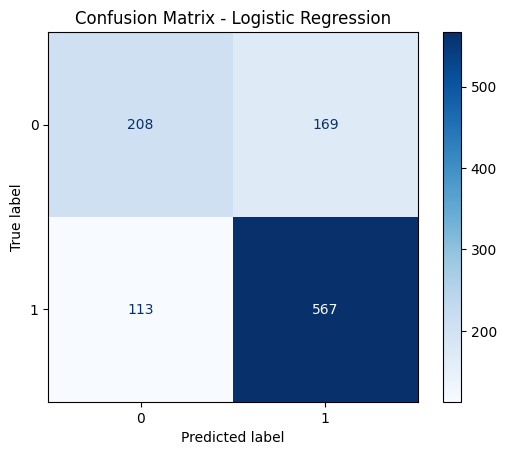

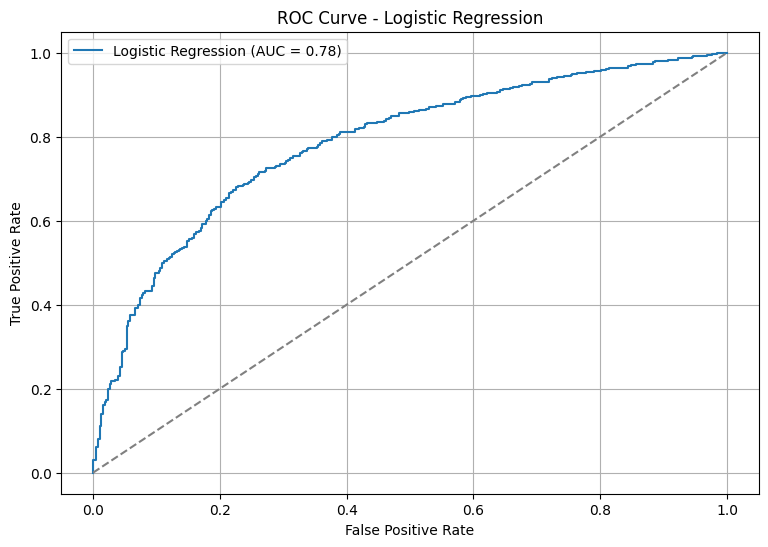

In [19]:
# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LOGISTIC REGRESSION
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Model Evaluation Metrics
print("Logistic Regression Classification Report - \n", classification_report(y_test, y_pred_lr))
print("Accuracy - ", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC Score - ", roc_auc_score(y_test, y_prob_lr))

# Confusion matrix
cmat_lr = confusion_matrix(y_test, y_pred_lr)
cmdisp_lr = ConfusionMatrixDisplay(confusion_matrix = cmat_lr, display_labels = lr.classes_)
cmdisp_lr.plot(cmap = 'Blues', values_format = 'd')

plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(9, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()

Random Forest Classification Report - 
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       377
           1       0.81      0.83      0.82       680

    accuracy                           0.76      1057
   macro avg       0.74      0.74      0.74      1057
weighted avg       0.76      0.76      0.76      1057

Accuracy -  0.7634815515610217
ROC-AUC Score -  0.8211538461538462


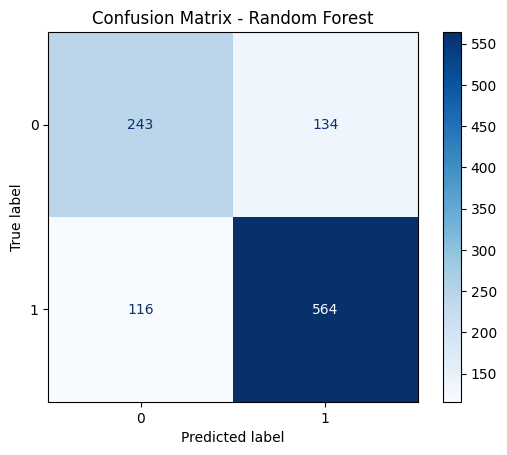

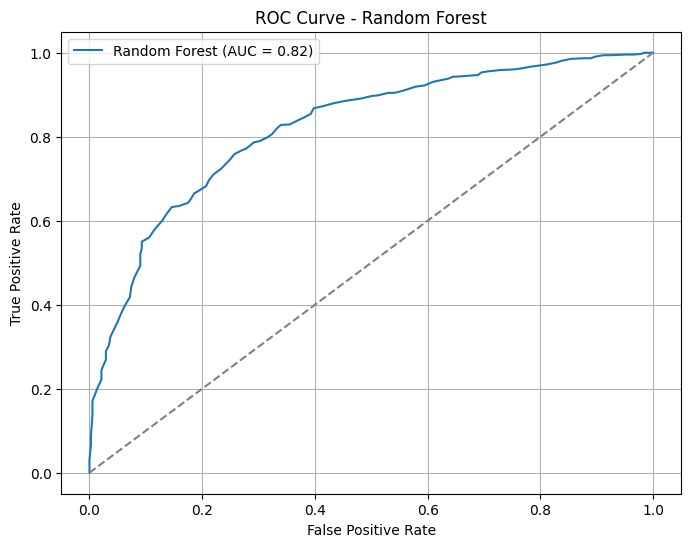

In [20]:
# RANDOM FOREST
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Model Evaluation Metrics
print("Random Forest Classification Report - \n", classification_report(y_test, y_pred_rf))
print("Accuracy - ", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC Score - ", roc_auc_score(y_test, y_prob_rf))

# Confusion matrix
cmat_rf = confusion_matrix(y_test, y_pred_rf)
cmdisp_rf = ConfusionMatrixDisplay(confusion_matrix = cmat_rf, display_labels = lr.classes_)
cmdisp_rf.plot(cmap = 'Blues', values_format = 'd')

plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.58      0.62       377
           1       0.78      0.84      0.81       680

    accuracy                           0.75      1057
   macro avg       0.73      0.71      0.72      1057
weighted avg       0.74      0.75      0.74      1057

Accuracy: 0.7483443708609272
ROC-AUC Score: 0.8068848494304883


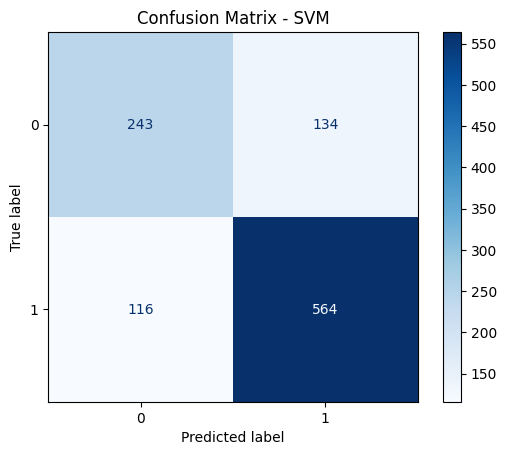

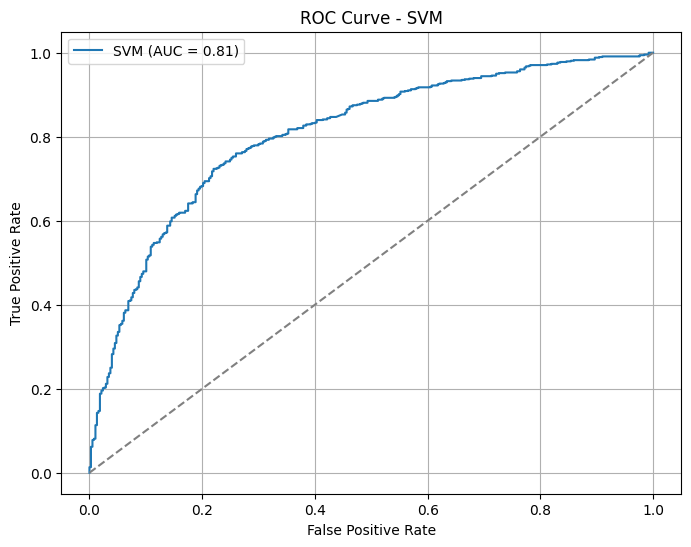

In [21]:
# SVM
svm = SVC(probability = True, random_state = 42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# Model Evaluation Metrics
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_svm))

# Confusion matrix
cmat_svm = confusion_matrix(y_test, y_pred_rf)
cmdisp_svm = ConfusionMatrixDisplay(confusion_matrix = cmat_svm, display_labels = lr.classes_)
cmdisp_svm.plot(cmap = 'Blues', values_format = 'd')

plt.title("Confusion Matrix - SVM")
plt.show()

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_score(y_test, y_prob_svm):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.grid()
plt.show()

In [22]:
wine_classDist = New_Wine['wineClass'].value_counts()
print(wine_classDist)
# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verifying class distribution after resampling
print("Class distribution after SMOTE - ")
print(pd.Series(y_resampled).value_counts())

wineClass
1    3327
0    1958
Name: count, dtype: int64
Class distribution after SMOTE - 
wineClass
0    3327
1    3327
Name: count, dtype: int64


In [23]:
# Standardizing the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [24]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_scaled, y_resampled, test_size = 0.2, random_state = 42, stratify = y_resampled
)

Logistic Regression Classification Report - 
               precision    recall  f1-score   support

           0       0.74      0.77      0.76       666
           1       0.76      0.73      0.75       665

    accuracy                           0.75      1331
   macro avg       0.75      0.75      0.75      1331
weighted avg       0.75      0.75      0.75      1331

Logistic Regression Accuracy -  0.7513148009015778
Logistic Regression ROC-AUC -  0.8187315134683556


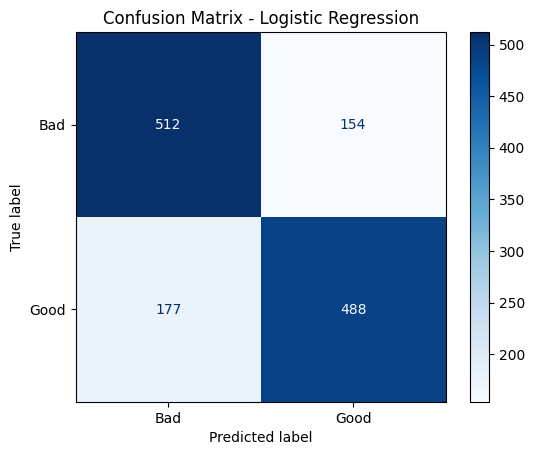

In [25]:
# Logistic Regression
lr1 = LogisticRegression(random_state = 42, max_iter = 1000)
lr1.fit(X_train, y_train)
y_pred_lr1 = lr1.predict(X_test)
y_pred_prob_lr1 = lr.predict_proba(X_test)[:, 1]

# Logistic Regression Evaluation
print("Logistic Regression Classification Report - \n", classification_report(y_test, y_pred_lr1))
print("Logistic Regression Accuracy - ", accuracy_score(y_test, y_pred_lr1))
print("Logistic Regression ROC-AUC - ", roc_auc_score(y_test, y_pred_prob_lr1))

# Logistic Regression Confusion Matrix
cmat_lr1 = confusion_matrix(y_test, y_pred_lr1)
disp_lr1 = ConfusionMatrixDisplay(confusion_matrix = cmat_lr1, display_labels=["Bad", "Good"])
disp_lr1.plot(cmap = "Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Random Forest Classification Report - 
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       666
           1       0.82      0.77      0.80       665

    accuracy                           0.80      1331
   macro avg       0.80      0.80      0.80      1331
weighted avg       0.80      0.80      0.80      1331

Random Forest Accuracy -  0.8016528925619835
Random Forest ROC-AUC -  0.8868398473661633


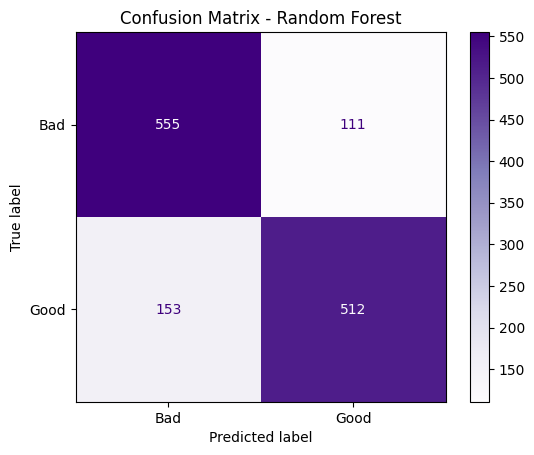

In [26]:
# Random Forest
rf1 = RandomForestClassifier(random_state = 42)
rf1.fit(X_train, y_train)
y_pred_rf1 = rf1.predict(X_test)
y_pred_proba_rf1 = rf1.predict_proba(X_test)[:, 1]

# Random Forest Evaluation
print("Random Forest Classification Report - \n", classification_report(y_test, y_pred_rf1))
print("Random Forest Accuracy - ", accuracy_score(y_test, y_pred_rf1))
print("Random Forest ROC-AUC - ", roc_auc_score(y_test, y_pred_proba_rf1))

# Random Forest Confusion Matrix
cmat_rf1 = confusion_matrix(y_test, y_pred_rf1)
disp_rf1 = ConfusionMatrixDisplay(confusion_matrix = cmat_rf1, display_labels=["Bad", "Good"])
disp_rf1.plot(cmap = "Purples")
plt.title("Confusion Matrix - Random Forest")
plt.show()

SVM Classification Report - 
               precision    recall  f1-score   support

           0       0.76      0.81      0.79       666
           1       0.80      0.75      0.77       665

    accuracy                           0.78      1331
   macro avg       0.78      0.78      0.78      1331
weighted avg       0.78      0.78      0.78      1331

SVM Accuracy -  0.7798647633358378
SVM ROC-AUC -  0.8411592043170991


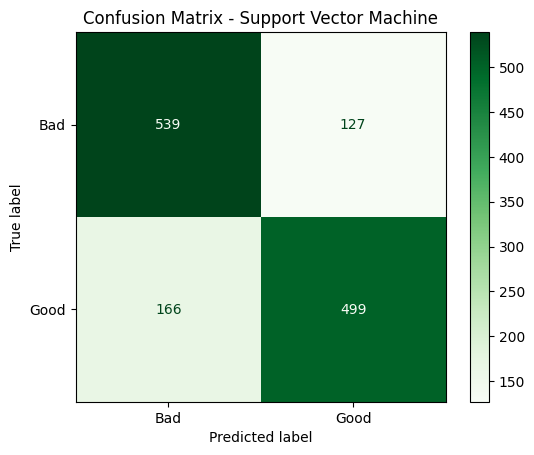

In [27]:
# Support Vector Machine
svm1 = SVC(probability = True, random_state = 42)
svm1.fit(X_train, y_train)
y_pred_svm1 = svm1.predict(X_test)
y_pred_proba_svm1 = svm1.predict_proba(X_test)[:, 1]

# Support Vector Machine (SVM) Evaluation
print("SVM Classification Report - \n", classification_report(y_test, y_pred_svm1))
print("SVM Accuracy - ", accuracy_score(y_test, y_pred_svm1))
print("SVM ROC-AUC - ", roc_auc_score(y_test, y_pred_proba_svm1))

# Support Vector Machine Confusion Matrix
cmat_svm1 = confusion_matrix(y_test, y_pred_svm1)
disp_svm1 = ConfusionMatrixDisplay(confusion_matrix = cmat_svm1, display_labels=["Bad", "Good"])
disp_svm1.plot(cmap="Greens")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

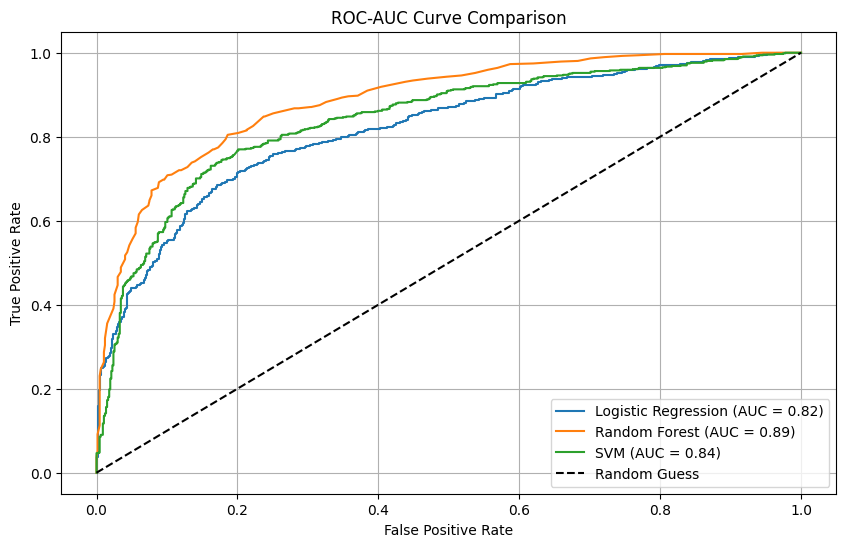

In [28]:
# Plotting ROC-AUC curves for all models
plt.figure(figsize=(10, 6))

# Logistic Regression ROC Curve
fpr_lr1, tpr_lr1, _ = roc_curve(y_test, y_pred_prob_lr1)
plt.plot(fpr_lr1, tpr_lr1, label=f"Logistic Regression (AUC = {auc(fpr_lr1, tpr_lr1):.2f})")

# Random Forest ROC Curve
fpr_rf1, tpr_rf1, _ = roc_curve(y_test, y_pred_proba_rf1)
plt.plot(fpr_rf1, tpr_rf1, label=f"Random Forest (AUC = {auc(fpr_rf1, tpr_rf1):.2f})")

# SVM ROC Curve
fpr_svm1, tpr_svm1, _ = roc_curve(y_test, y_pred_proba_svm1)
plt.plot(fpr_svm1, tpr_svm1, label=f"SVM (AUC = {auc(fpr_svm1, tpr_svm1):.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve Comparison")
plt.legend(loc = "lower right")
plt.grid()
plt.show()

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [30]:
red = pd.read_csv('/Users/srijaanasuri/Downloads/wine+quality (1)/winequality-red.csv', sep=';')
white = pd.read_csv('/Users/srijaanasuri/Downloads/wine+quality (1)/winequality-white.csv', sep=';')

In [31]:
# Create a new column 'color' to distinguish between red and white wines
red['color'] = 'red'
white['color'] = 'white'

# Combine the two dataframes
wine = pd.concat([red, white])

wine['color'] = wine['color'].map({'red': 1, 'white': 2})

wine = wine[~wine['quality'].isin([3, 4, 8, 9])]

In [32]:
wine['quality'].value_counts()

,count
quality,
6,2836
5,2138
7,1079


In [33]:
# Feature Selection using Correlation Matrix
corr_matrix = wine.corr()
quality_corr = abs(corr_matrix['quality']).sort_values(ascending=False)
important_features = quality_corr[1:6].index.tolist()  # Select top 5 features excluding 'quality' itself
print(f"Important features based on correlation: {important_features}")

Important features based on correlation: ['alcohol', 'density', 'volatile acidity', 'chlorides', 'color']


In [34]:
X = wine[important_features]
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print("Classification Report (Without PCA):\n", classification_report(y_test, y_pred))

Classification Report (Without PCA):
               precision    recall  f1-score   support

           5       0.70      0.72      0.71       412
           6       0.71      0.74      0.72       594
           7       0.72      0.59      0.65       205

    accuracy                           0.71      1211
   macro avg       0.71      0.68      0.69      1211
weighted avg       0.71      0.71      0.71      1211



In [36]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# Random Forest Classifier after PCA
rf_classifier_pca = RandomForestClassifier(random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_classifier_pca.predict(X_test_pca)
print("\nClassification Report (With PCA):\n", classification_report(y_test, y_pred_pca))


Classification Report (With PCA):
               precision    recall  f1-score   support

           5       0.68      0.73      0.70       412
           6       0.70      0.65      0.68       594
           7       0.56      0.59      0.58       205

    accuracy                           0.67      1211
   macro avg       0.65      0.66      0.65      1211
weighted avg       0.67      0.67      0.67      1211



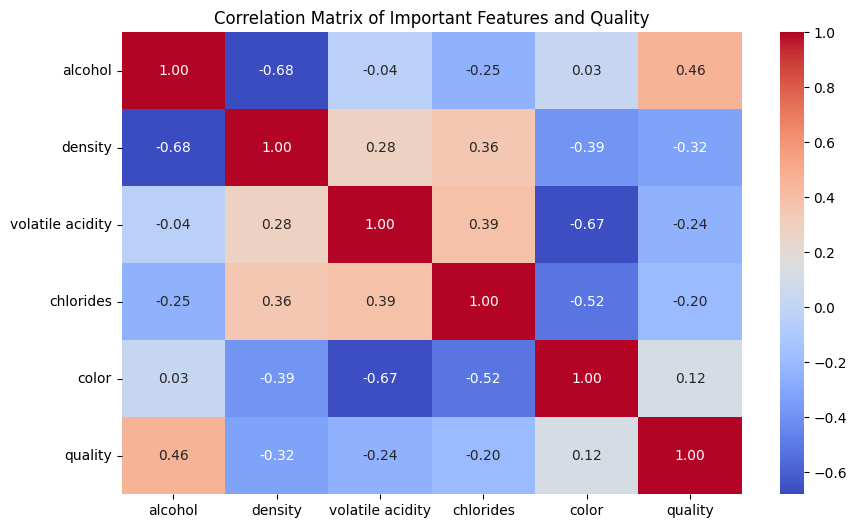

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(wine[important_features + ['quality']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Important Features and Quality')
plt.show()

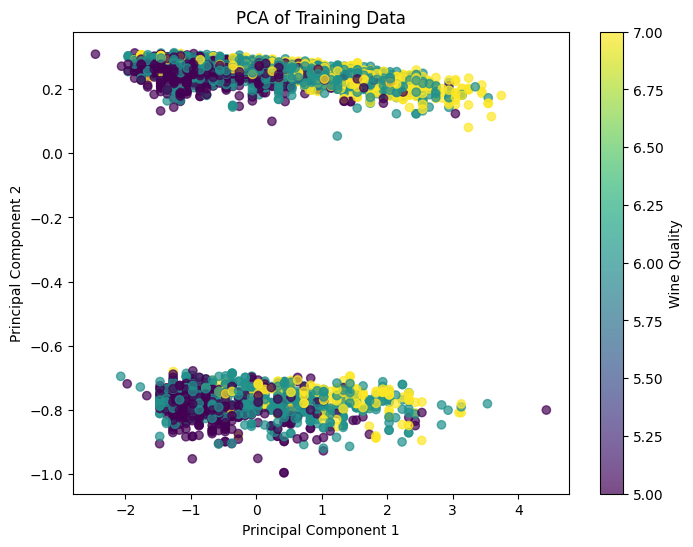

In [38]:
# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.title('PCA of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Wine Quality')
plt.show()

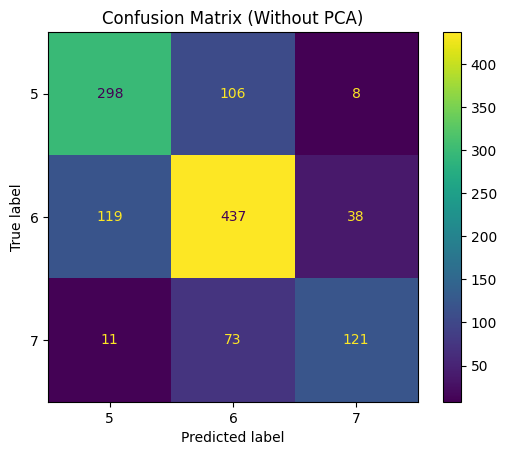

In [39]:
# Visualize classification report
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix (Without PCA)")
plt.show()

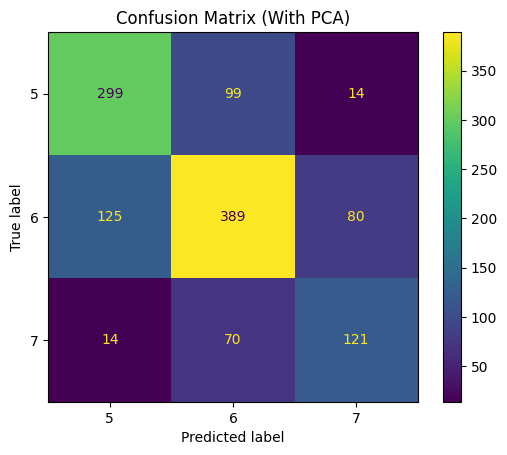

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_pca)
plt.title("Confusion Matrix (With PCA)")
plt.show()